In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [9]:
data = loadmat('ADA4-digit.mat')
train = data['X']
test = data['T']

print(type(data))
print(type(train))
print(type(test))

<class 'dict'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
print("Train data: {}".format(train.shape))
print("Test data:  {}".format(test.shape))

Train data: (256, 500, 10)
Test data:  (256, 200, 10)


(256,)


array([[-0.99999988, -0.99999988, -0.99999988, ..., -0.99999988,
        -0.99999988, -0.99999988],
       [-0.99999988, -0.99999988, -0.99999988, ..., -0.99999988,
        -0.99999988, -0.99999988],
       [-0.99999988, -0.99999988, -0.99999988, ..., -0.99999988,
        -0.99999988, -0.99998951],
       ...,
       [-0.99999988, -0.99999988, -0.99999988, ..., -0.99999988,
        -0.99999988, -0.99999988],
       [-0.99999988, -0.99999988, -0.99999988, ..., -0.99999988,
        -0.99999988, -0.99999988],
       [-0.99999988, -0.99999988, -0.99999988, ..., -0.99999988,
        -0.99999988, -0.99999988]])

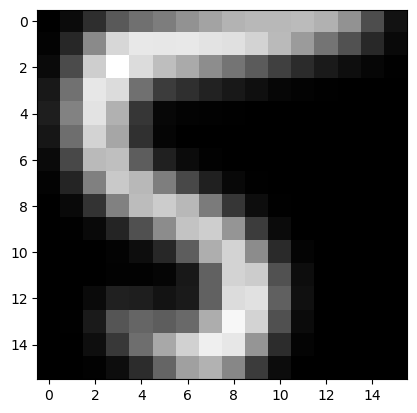

In [20]:
x=train[:, 22, 4]
print(x.shape)
plt.imshow(x.reshape(16, 16), 'gray')

train[:,:,0]

In [21]:
# Make a classifier for one and two
mu1 = np.mean(train[:, :, 0], axis=1)
mu2 = np.mean(train[:, :, 1], axis=1)
S = (np.cov(train[:, :, 0]) + np.cov(train[:, :, 1])) / 2
print(S.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(256, 256)


In [12]:
t = test[:, 0, 1]
invS = np.linalg.inv(S + 0.000001 * np.identity(256))
p1 = mu1[None, :].dot(invS).dot(t) - mu1[None, :].dot(invS).dot(mu1)/2
p2 = mu2[None, :].dot(invS).dot(t) - mu2[None, :].dot(invS).dot(mu2)/2
print(np.sign(p1 - p2))

[-1.]


In [13]:
t = test[:, :, 1]
p1 = mu1[None, :].dot(invS).dot(t) - mu1[None, :].dot(invS).dot(mu1[:, None]) / 2
p2 = mu2[None, :].dot(invS).dot(t) - mu2[None, :].dot(invS).dot(mu2[:, None]) / 2
result = np.sign(p1 - p2)

In [14]:
print("The number of correct prediction: {}".format(np.sum(result == -1)))
print("The number of false prediction:   {}".format(np.sum(result != -1)))

The number of correct prediction: 198
The number of false prediction:   2


In [15]:
print(np.where(result != -1)[1])

[ 68 179]


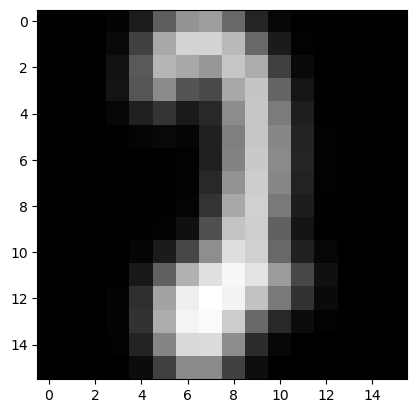

In [16]:
wrong1 = test[:, 68, 1]
plt.imshow(wrong1.reshape(16, 16), 'gray')

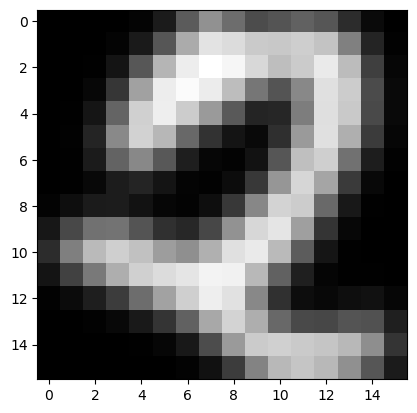

In [17]:
wrong2 = test[:, 179, 1]
plt.imshow(wrong2.reshape(16, 16), 'gray')